# Imports of needed libraries.

- Pandas is the library used for managing datasets
- Numpy is used for numerical operations
- MatPlotLib is basically the one that is used for plotting

In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# First step is to load our dataset

I made total of three dataset to demonstrate perceptron and it's capabilities.
```AND_GATE.csv``` and ```OR_GATE.csv``` both contain normal linear data, while ```XOR_GATE.csv``` is used to demonstrate the XOR gate problem, and the behavior of the single-layer perceptron with data that cannot be linear separated.

In [645]:
df = pd.read_csv("https://raw.githubusercontent.com/JulWas797/Perceptron-Jupyter/main/OR_GATE.csv")

# Next things we need to do is to define variables that we will need

- Learning rate, e.g. the total "change" made while learning. The usage of it is described [here](https://en.wikipedia.org/wiki/Delta_rule)
- Weights, the importance of specified input
- Bias, the error that is injected into the sum. You can find nice graph explaining it [here](https://www.researchgate.net/publication/327392288/figure/fig1/AS:666616886984704@1535945259693/The-graph-of-a-perceptron-x1-xm-are-input-signals-w1-wm-are-the-weights.png)
- Epochs, the maximum number of training iterations

In [646]:
learningRate = 0.003
weights = [0, 0]
bias = 0
epochs = 100

# Here we define the activation function used for learning.

I decided to use standard Heaviside step, but there are many different functions that were added bellow.

In [647]:
def activation(val):
    return 1 if val >= 0 else 0 # Heaviside
#   return val # Linear
#   return max(0, val) # RelU
#   return 1 / (1 + np.exp(-val)) # Sigmoid
#   return val if val >= 0 else 0.01 * val # Leaky RelU

# There is our core of perceptron learning.

You can get good information on how it works [on the Toronto University ML Lecture no. 3](https://www.cs.toronto.edu/~hinton/coursera/lecture3/lec3.pdf)

In [648]:
for i in range(epochs):
    correct, incorrect = 0, 0
    for index, row in df.iterrows():
        predicted = bias
        for j in range(2):
            predicted += row[j] * weights[j]
        error = row["expected"] - activation(predicted)
        if error == 0:
            correct+=1
        else:
            incorrect+=1
        for j in range(2):
            weights[j] += learningRate * error * row[j]
        bias += error * learningRate
    print("Epoch {} | Correct guesses: {}, Incorrect guesses: {}".format(i, correct, incorrect))

Epoch 0 | Correct guesses: 2, Incorrect guesses: 2
Epoch 1 | Correct guesses: 2, Incorrect guesses: 2
Epoch 2 | Correct guesses: 3, Incorrect guesses: 1
Epoch 3 | Correct guesses: 4, Incorrect guesses: 0
Epoch 4 | Correct guesses: 4, Incorrect guesses: 0
Epoch 5 | Correct guesses: 4, Incorrect guesses: 0
Epoch 6 | Correct guesses: 4, Incorrect guesses: 0
Epoch 7 | Correct guesses: 4, Incorrect guesses: 0
Epoch 8 | Correct guesses: 4, Incorrect guesses: 0
Epoch 9 | Correct guesses: 4, Incorrect guesses: 0
Epoch 10 | Correct guesses: 4, Incorrect guesses: 0
Epoch 11 | Correct guesses: 4, Incorrect guesses: 0
Epoch 12 | Correct guesses: 4, Incorrect guesses: 0
Epoch 13 | Correct guesses: 4, Incorrect guesses: 0
Epoch 14 | Correct guesses: 4, Incorrect guesses: 0
Epoch 15 | Correct guesses: 4, Incorrect guesses: 0
Epoch 16 | Correct guesses: 4, Incorrect guesses: 0
Epoch 17 | Correct guesses: 4, Incorrect guesses: 0
Epoch 18 | Correct guesses: 4, Incorrect guesses: 0
Epoch 19 | Correct gue

# Here is the plotting algorithm

We take first input as x-axis, and the second as the y-axis.

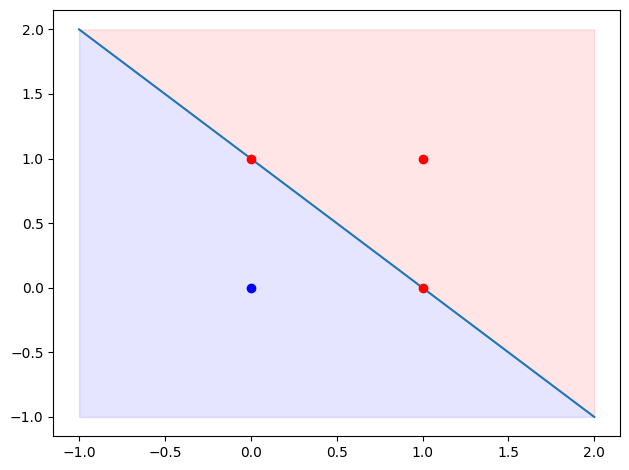

In [649]:
x = np.linspace(-1, 2, 100)
y = -(weights[0] * x + bias) / weights[1]
plt.plot(x, y)
plt.fill_between(x, y, 2, color='r', alpha=0.1)
plt.fill_between(x, y, -1, color='b', alpha=0.1)
for _, row in df.iterrows():
    px, py = row["input1"], row["input2"]
    point = "or" if row["expected"] == 1 else "ob"
    plt.plot(px, py, point)
plt.subplots_adjust(left=-1, right=2, bottom=-1, top=2)
plt.tight_layout()